In [1]:
#imported all required libraries
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessor import replacer #for handelling nulls calling function
from preprocessor import data_prep #for handeling data (standardization and one hot ) calling function
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Task1:Check eligibility of the Customer given the inputs described above.(Classification)

In [2]:
#Reading file
train_loan=pd.read_csv("C:/Users/01/Desktop/ML/ML project2 material/training_set.csv")

In [3]:
train_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_loan.shape

(614, 13)

In [5]:
train_loan.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#handeling nulls
from preprocessor import replacer
replacer(train_loan)

In [7]:
#splitting x and y

In [8]:
Y = train_loan[["Loan_Status"]]

In [10]:
X = train_loan.drop(labels=["Loan_ID","Loan_Status"],axis=1)

#EDA Y[cat] <---> X[con] --> ANOVA/boxplot
Y[cat] <---> X[cat] --> CHISQ/Countplot with Hue

In [11]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:
imp_cols = []
from PM8 import ANOVA,chisquare
for i in con:
    q = ANOVA(train_loan,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs ApplicantIncome
Pval:  0.903
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.142
-------------
Loan_Status vs LoanAmount
Pval:  0.368
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.604
-------------
Loan_Status vs Credit_History
Pval:  0.0


In [14]:
for i in cat:
    q = chisquare(train_loan,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs Gender
Pval:  0.7391461310869638
-------------
Loan_Status vs Married
Pval:  0.029608580862582116
-------------
Loan_Status vs Dependents
Pval:  0.3688663081366005
-------------
Loan_Status vs Education
Pval:  0.04309962129357355
-------------
Loan_Status vs Self_Employed
Pval:  1.0
-------------
Loan_Status vs Property_Area
Pval:  0.0021360187811644915


In [15]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area']

In [16]:
from PM8 import preprocessing
Xnew = preprocessing(X[imp_cols])

In [17]:
Xnew.head()

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.554368,0.45164,1,0,1,0,0,0,1
1,-0.038610,0.45164,0,1,1,0,1,0,0
2,-0.554368,0.45164,0,1,1,0,0,0,1
3,0.252103,0.45164,0,1,0,1,0,0,1
4,-0.554368,0.45164,1,0,1,0,0,0,1


In [18]:

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [19]:
#creating model logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)

In [21]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [22]:
#checking for overfitting or not
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts) 

In [23]:
tr_acc


0.8130081300813008

In [24]:
ts_acc

0.8130081300813008

so by above analysis we can see there is not much difference in train acc and test acc so this looks good model but still we will check for other model also if it working best

In [26]:
#Decision Tree
X = train_loan.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [27]:
tr_acc

1.0

In [28]:
ts_acc

0.7317073170731707

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
def tree(dtc):
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    return tr_acc,ts_acc

In [30]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.8211382113821138)
(0.8268839103869654, 0.7886178861788617)
(0.8370672097759674, 0.8048780487804879)
(0.8553971486761711, 0.7886178861788617)
(0.8737270875763747, 0.7804878048780488)
(0.890020366598778, 0.7723577235772358)
(0.90020366598778, 0.7642276422764228)
(0.9226069246435845, 0.7642276422764228)
(0.9389002036659878, 0.7154471544715447)
(0.9531568228105907, 0.6991869918699187)
(0.9613034623217923, 0.6910569105691057)
(0.9674134419551935, 0.6747967479674797)
(0.9796334012219959, 0.6829268292682927)
(0.9877800407331976, 0.7073170731707317)
(0.9959266802443992, 0.6910569105691057)
(0.9979633401221996, 0.6829268292682927)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)


In [31]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print(tree(dtc))

(0.9470468431771895, 0.6747967479674797)
(0.9144602851323829, 0.6910569105691057)
(0.8859470468431772, 0.6991869918699187)
(0.8757637474541752, 0.7398373983739838)
(0.8574338085539714, 0.6829268292682927)
(0.8472505091649695, 0.7154471544715447)
(0.8411405295315683, 0.7154471544715447)
(0.8411405295315683, 0.7235772357723578)
(0.8309572301425662, 0.7560975609756098)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8289205702647657, 0.7723577235772358)
(0.8309572301425662, 0.7560975609756098)
(0.8268839103869654, 0.7479674796747967)
(0.8228105906313645, 0.7560975609756098)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.6991869918699187)
(0.8105906313645621, 0.6829268292682927)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8065173116089613,

In [32]:
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    print(tree(dtc))

(1.0, 0.6910569105691057)
(0.9877800407331976, 0.6991869918699187)
(0.9694501018329938, 0.7073170731707317)
(0.955193482688391, 0.6910569105691057)
(0.9368635437881874, 0.6829268292682927)
(0.9226069246435845, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9063136456211812, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.8961303462321792, 0.6910569105691057)
(0.890020366598778, 0.6747967479674797)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.879837067209776, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6991869918699187)
(0.8757637474541752, 0.6991869918699187)
(0.8716904276985743, 0.69918699186

In [33]:
#Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tree(abc)

(0.9063136456211812, 0.7073170731707317)

In [35]:
for i in range(2,50):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=i)
    print(tree(abc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.7804878048780488)
(0.8167006109979633, 0.7723577235772358)
(0.8187372708757638, 0.7560975609756098)
(0.8289205702647657, 0.7154471544715447)
(0.8268839103869654, 0.7154471544715447)
(0.8329938900203666, 0.7235772357723578)
(0.8431771894093686, 0.7235772357723578)
(0.8472505091649695, 0.7235772357723578)
(0.8533604887983707, 0.7235772357723578)
(0.8574338085539714, 0.7398373983739838)
(0.8635437881873728, 0.7398373983739838)
(0.8615071283095723, 0.7560975609756098)
(0.869653767820774, 0.7154471544715447)
(0.8716904276985743, 0.7073170731707317)
(0.8737270875763747, 0.7073170731707317)
(0.8757637474541752, 0.7479674796747967)
(0.8839103869653768, 0.7235772357723578)
(0.8839103869653768, 0.7317073170731707)
(0.879837067209776, 0.7398373983739838)
(0.8961303462321792, 0.7073170731707317)
(0.8940936863543788, 0.6991869918699187)
(0.8961303462321792, 0.6991869918699187)
(0.90020366598778, 0.6910569105691057)
(0.90020366598778, 0.6

In [36]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)

# Make predictions using best model

In [37]:
#applying predictions on test data for loan status prediction

test_loan=pd.read_csv("C:/Users/01/Desktop/ML/ML project2 material/testing_set.csv")

In [38]:
X = test_loan.drop(labels=["Loan_ID"],axis=1)
replacer(X)
Xnew = preprocessing(X)
pred = model.predict(Xnew)

In [39]:
test_loan['Loan_Status_Pred']=pred

In [40]:
pd.DataFrame([Xnew.columns,dtc.feature_importances_]).T

,0,1
0,ApplicantIncome,0.0
1,CoapplicantIncome,0.042743
2,LoanAmount,0.020849
3,Loan_Amount_Term,0.0
4,Credit_History,0.936407
5,Gender_Female,0.0
6,Gender_Male,0.0
7,Married_No,0.0
8,Married_Yes,0.0
9,Dependents_0,0.0


# Task2 Identifying customer segment

In [41]:
X = train_loan[["Credit_History","LoanAmount","CoapplicantIncome"]]

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=["Credit_History","LoanAmount","CoapplicantIncome"])

In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model = km.fit(Xnew)

In [44]:
X['Cluster'] = model.labels_

In [45]:
q = []
for i in X.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [46]:
X.Credit_History = q

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(train_loan['Loan_Status'])

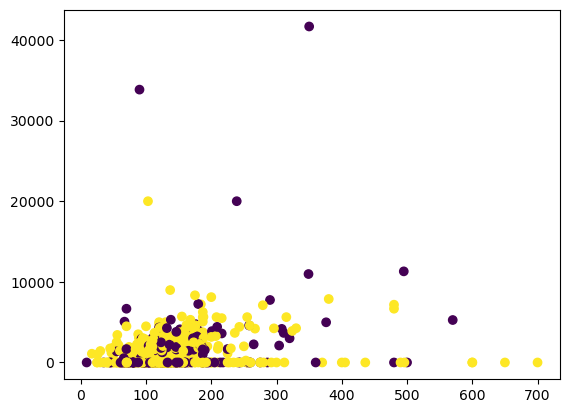

In [49]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)

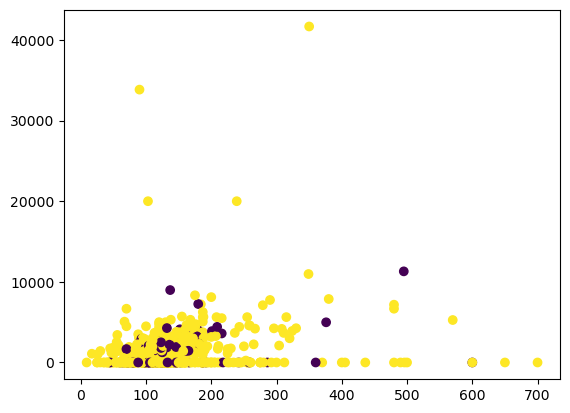

In [50]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

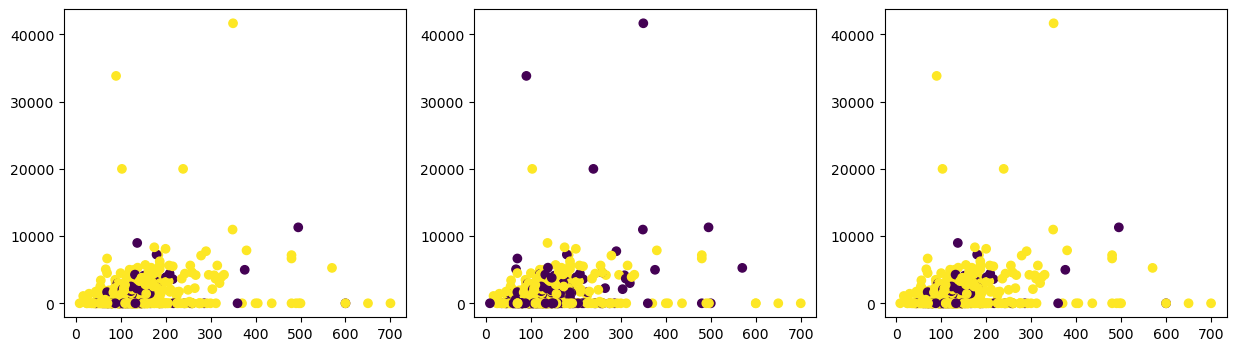

In [51]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)
plt.subplot(1,3,2)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)
plt.subplot(1,3,3)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

# Task 3 3.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

In [54]:
Q1 = train_loan[train_loan.Loan_Status == "Y"]
Q2 = test_loan[test_loan.Loan_Status_Pred == "Y"]
Q2 = Q2.rename({"Loan_Status_Pred":"Loan_Status"},axis=1)

In [56]:
new=trd = pd.concat([Q1,Q2])

In [57]:
replacer(new)

In [58]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)


In [59]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

In [60]:
#Define Y and X

In [61]:
Y = new[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,725)
Xnew = X1.join(X2)

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [63]:
for i in X.columns:
    if(X[i].dtypes == "object"):
        print("------------------------")
        print("Loan AMt vs",i)
        print(ANOVA(trd,i,"LoanAmount"))

------------------------
Loan AMt vs Gender
0.003
------------------------
Loan AMt vs Married
0.0
------------------------
Loan AMt vs Dependents
0.0
------------------------
Loan AMt vs Education
0.0
------------------------
Loan AMt vs Self_Employed
0.0
------------------------
Loan AMt vs Property_Area
0.808


In [64]:
#linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [65]:
from PM8 import find_overfit_con

In [66]:
find_overfit_con(lm,xtrain, xtest, ytrain, ytest)

training error:  35.979071650096074
testing error:  38.31756753052345


In [68]:
#prepration for prediction
test = test_loan[test_loan.Loan_Status_Pred == "N"]

In [69]:
test = test.drop(labels=["Loan_Status_Pred","Loan_ID","LoanAmount"],axis=1)

In [70]:
replacer(test)
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [71]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,64)
Xnew = X1.join(X2)

In [72]:
predicted_amount = model.predict(Xnew)

In [73]:
predicted_amount

array([[130.21226659],
       [285.81174605],
       [137.13872913],
       [106.80328902],
       [ 95.22027989],
       [143.54276247],
       [ 93.77634918],
       [135.44818787],
       [128.44456758],
       [127.42635821],
       [140.59369361],
       [148.69387705],
       [124.05493442],
       [150.63427853],
       [160.98071324],
       [124.76962896],
       [ 82.19167492],
       [107.01611367],
       [ 90.13249568],
       [103.91374447],
       [116.10896449],
       [260.39575151],
       [158.01032974],
       [130.46059313],
       [174.17330266],
       [200.39117664],
       [106.24909598],
       [103.68890255],
       [ 78.0249529 ],
       [ 72.70752799],
       [119.14110344],
       [ 88.54718675],
       [101.21657094],
       [139.01852785],
       [112.24739567],
       [155.76873566],
       [122.13455223],
       [149.19017387],
       [171.37388761],
       [145.2602693 ],
       [342.1042384 ],
       [ 96.45031778],
       [112.69208163],
       [204

In [74]:
test_loan[test_loan.Loan_Status_Pred == "N"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.0,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.0,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural,N


# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [76]:
test = test_loan[test_loan.Loan_Amount_Term <= 240]
test.index = range(0,34)

In [78]:
replacer(train_loan)
Y = train_loan[["Loan_Amount_Term"]]
X = train_loan.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [79]:
lm = LinearRegression()
find_overfit_con(lm,xtrain,xtest,ytrain,ytest)

training error:  36.58006474242112
testing error:  34.48612084084374


In [80]:
replacer(test)
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status_Pred'],axis=1)
Xnew = preprocessing(X)

lm.predict(Xnew)

array([[347.34221757],
       [321.07582753],
       [355.65110838],
       [312.42234927],
       [349.64331229],
       [334.86760046],
       [332.21006182],
       [347.06494185],
       [324.70892655],
       [321.97909501],
       [360.27920852],
       [329.12884171],
       [338.10475616],
       [350.46330787],
       [350.21513959],
       [322.08329792],
       [357.16252866],
       [337.56491043],
       [357.76491827],
       [343.13446752],
       [333.4430377 ],
       [346.0474132 ],
       [354.77338849],
       [359.24997626],
       [363.88093817],
       [349.70757196],
       [353.63002369],
       [316.70734395],
       [360.97473789],
       [320.59539337],
       [335.88489896],
       [313.85659252],
       [321.97332673],
       [348.48462164]])